### Flight Fare Prediction

In [1]:
# The main aim of this project is to predict the correct Flight fate for any journey using Machine Learning Techniques and Auto ML

### Time Line of the Project 

1. Data Analysis: Finding out different relations
2. Feature Engineering: Doing various operaitons on Data
3. Model Building using ML: Using ML algo
4. Model Building using Auto ML

In [2]:
# Imporiting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
flight_df = pd.read_csv('flight data.csv')
flight_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [4]:
flight_df.shape

(10683, 11)

In [5]:
test_df1 = pd.read_csv('flight test.csv')
test_df1.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [6]:
test_df1.shape

(2671, 10)

In [7]:
# Combine the two datasets using concat
df = pd.concat([flight_df, test_df1], ignore_index=True)
df.head()



Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [8]:
df.tail()

Airline Date_of_Journey   Source Destination  \
13349          Air India       6/06/2019  Kolkata    Banglore   
13350             IndiGo      27/03/2019  Kolkata    Banglore   
13351        Jet Airways       6/03/2019    Delhi      Cochin   
13352          Air India       6/03/2019    Delhi      Cochin   
13353  Multiple carriers      15/06/2019    Delhi      Cochin   

                 Route Dep_Time  Arrival_Time Duration Total_Stops  \
13349  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
13350        CCU → BLR    14:20         16:55   2h 35m    non-stop   
13351  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
13352  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
13353  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

      Additional_Info  Price  
13349         No info    NaN  
13350         No info    NaN  
13351         No info    NaN  
13352         No info    NaN  
13353         No info    NaN

In [9]:
df.shape

(13354, 11)

### Understanding the data

### Data Analysis for 

In [10]:
flight_df['Airline'].value_counts() 

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

D:\Projects\analysis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


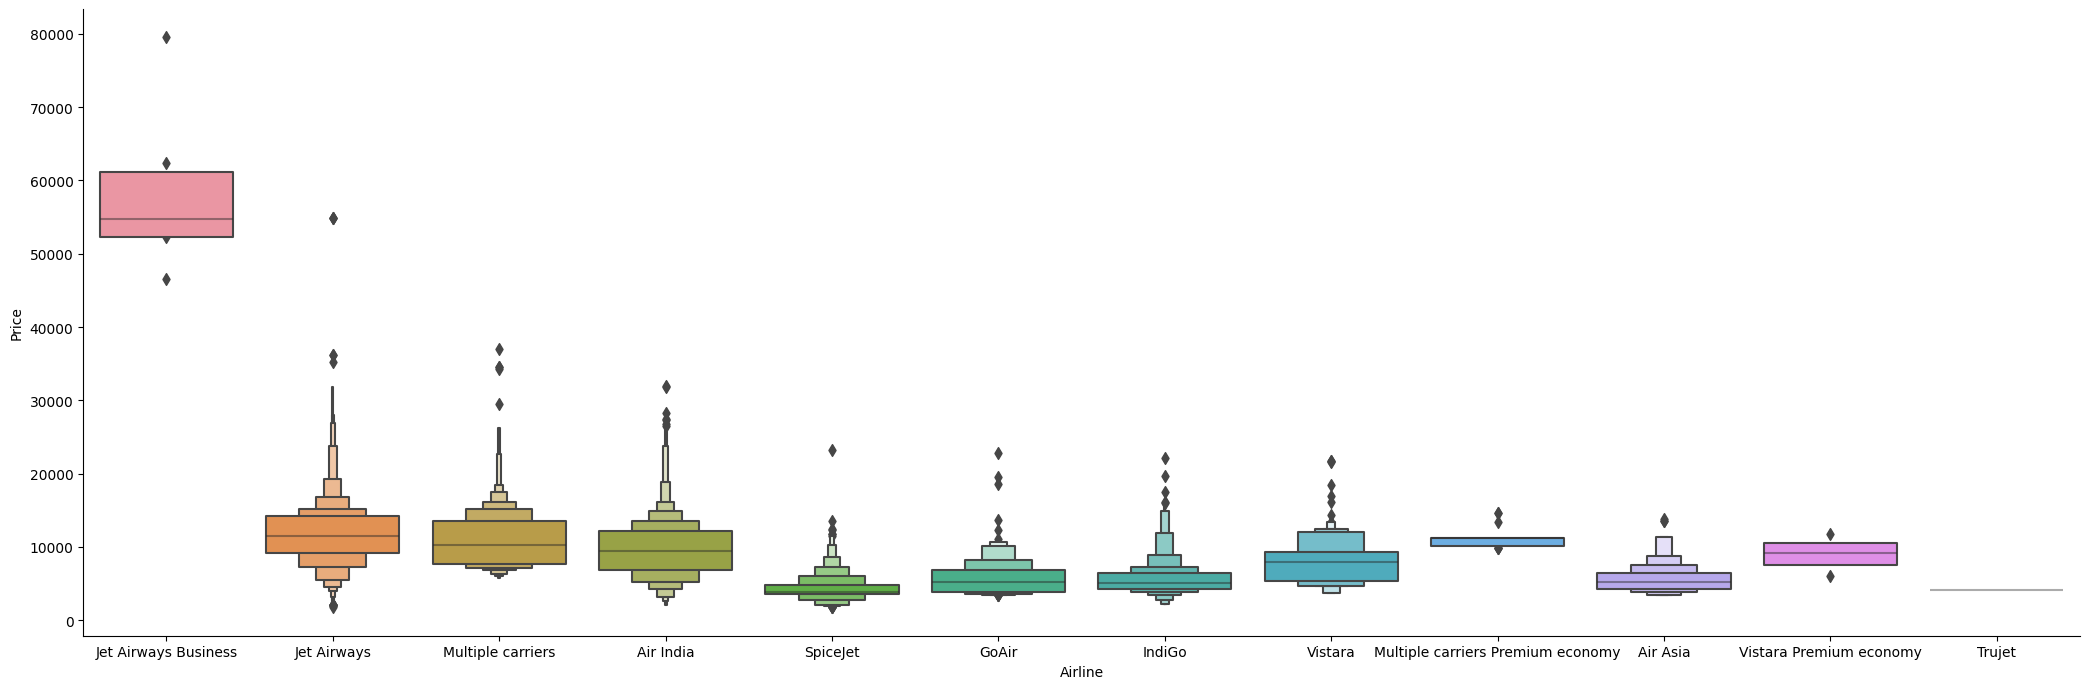

In [11]:
sns.catplot(x = 'Airline', y = 'Price', data = flight_df.sort_values('Price', ascending=False), kind = 'boxen', height = 7, aspect = 3)
plt.show()

from this we can the jet airways has highest fare, highest quartile range and average is also highest around 5300. And for other are a similar. <br>
Spicejet is least costly for all

In [12]:
df['Source'].value_counts()

Source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: count, dtype: int64

D:\Projects\analysis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


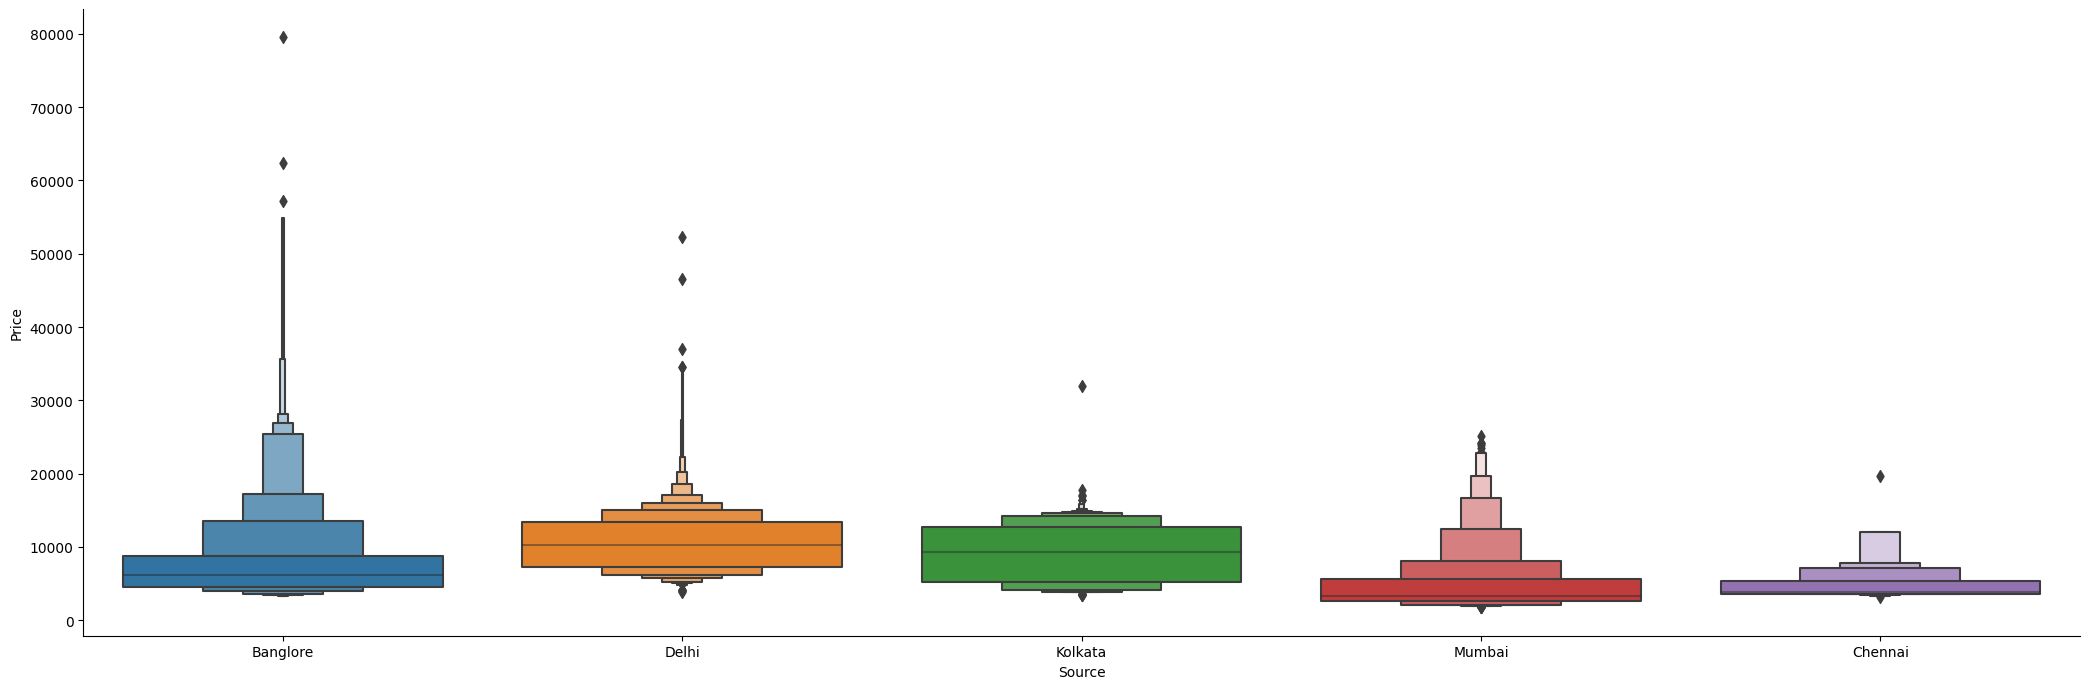

In [13]:
sns.catplot(x = 'Source', y = 'Price', data = flight_df.sort_values('Price', ascending=False), kind = 'boxen', height = 7, aspect = 3)


Banglore and Delhi quite have higher quartile range which means there are some flight are higher range in Baglore and Delhi

In [14]:
df['Destination'].value_counts()

Destination
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: count, dtype: int64

D:\Projects\analysis\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



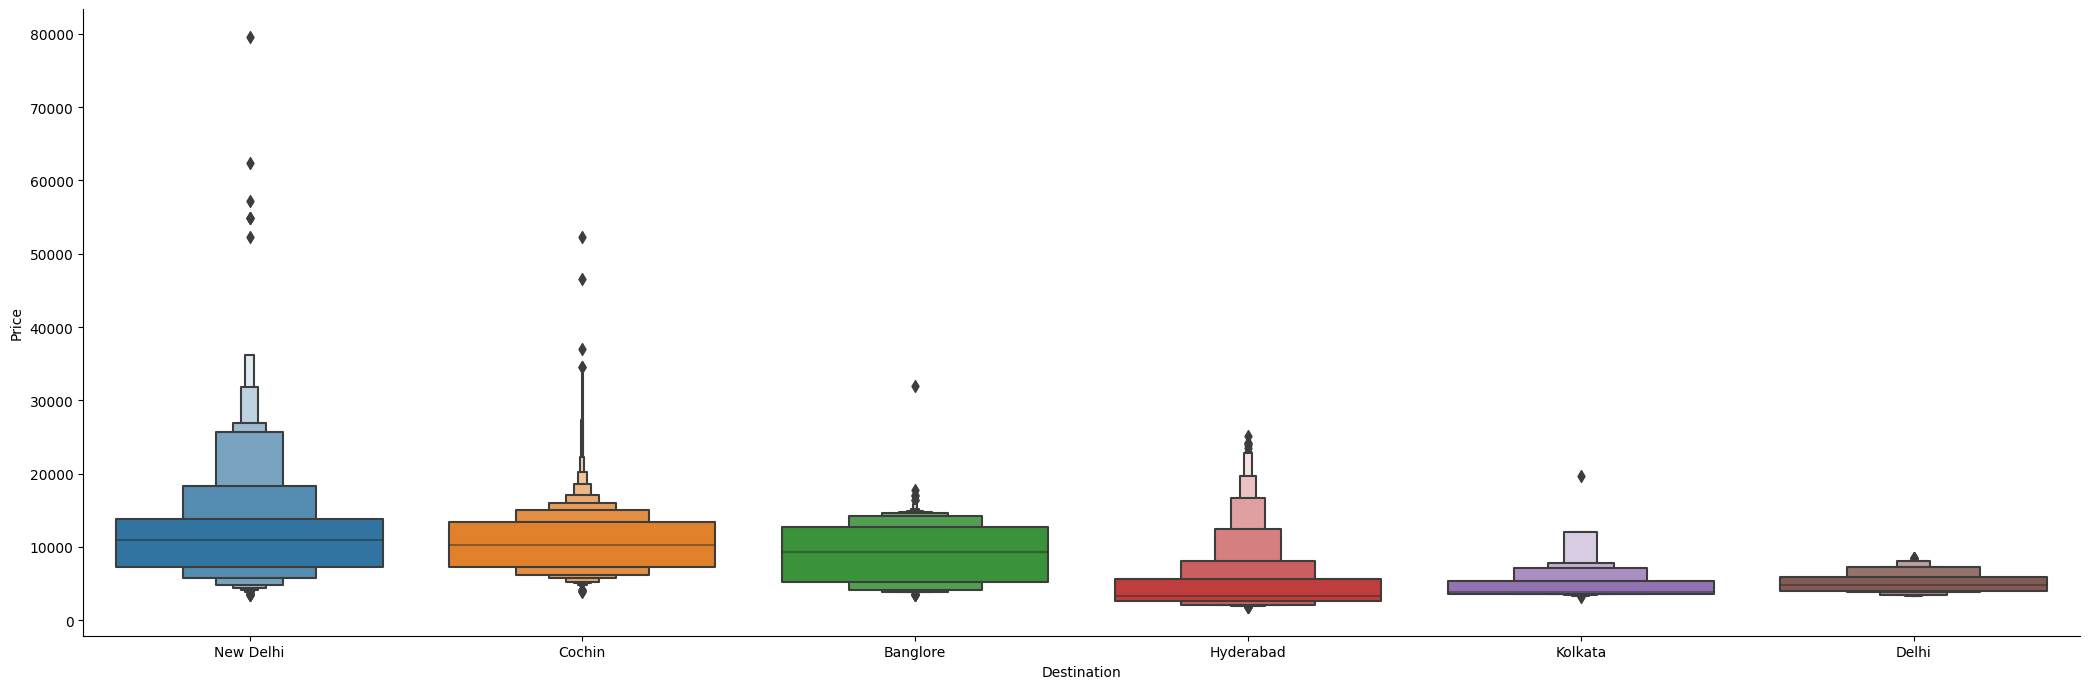

In [85]:
sns.catplot(x = 'Destination', y = 'Price', data = flight_df.sort_values('Price', ascending=False), kind = 'boxen', height = 7, aspect = 3)


They almost have the same prices, only difference is the new delhi which have higher quartile range, and there are some exceptional or outliers. if we exclude this they are almost same

### Feature Engineering

In [16]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [17]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [18]:
df['Date'] = df ['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df ['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df ['Date_of_Journey'].str.split('/').str[2].astype(int)

In [19]:
# After that dropping date_of_journey columns
df=df.drop(['Date_of_Journey'], axis = 1)


In [20]:
# In columns Arrival_Time column is in irregular way so we split the month and date
df["Arrival_Time"] = df["Arrival_Time"].str.split(' ').str[0]

In [21]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [22]:
df["Total_Stops"] = df["Total_Stops"].fillna('1 stop')
df['Total_Stops'].isna().sum().sum()

0

In [23]:
# replacing non stop with 0 stops
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0 stop')
# Taking only numeric data
df['Stops'] = df['Total_Stops'].str.split(' ').str[0]

In [24]:
df = df.drop(['Total_Stops'], axis = 1) # removing Total_Stops
df['Stops'] = df['Stops'].astype(int) # converting to integer
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
dtype: object

In [25]:
### Similrly we will try to comvert all the features to numberical variables

In [26]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

  Arrival_Time Duration Additional_Info    Price  Date  Month  Year  Stops  
0        01:10   2h 50m         No info   3897.0    24      3  2019      0  
1        13:15   7h 25m         No info   7662.0     1      5  2019      2  
2        04:25      19h         No info  13882.0     9      6  2019      2  
3        23:30   5h 25m         No info   6218.0    12      5  2019      1  
4        21:35   4h 45m         No info  13302.0     1      3  2019      1

In [27]:
# seperating Arrival Hour and Arrival Time from column Arrival Time and converting them to integer
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1].astype(int)
df = df.drop(['Arrival_Time'], axis =1)

In [28]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1].astype(int)
df = df.drop(['Dep_Time'], axis =1)

In [29]:
df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Additional_Info    Price  Date  Month  Year  Stops  Arrival_Hour  \
0         No info   3897.0    24      3  2019      0             1   
1         No info   7662.0     1      5  2019      2            13   
2         No info  13882.0     9      6  2019      2             4   
3         No info   6218.0    12      5  2019      1            23   
4         No info  13302.0     1      3  2019      1            21   

   Arrival_Minute  Departure_Hour  Departure_Minute  
0              10              22                20  
1              15               5                50  
2              25               9                25  
3              30              18                 5  
4              35              16                50

In [30]:
df['Route_1'] = df['Route'].str.split('→ ').str[0]
df['Route_2'] = df['Route'].str.split('→ ').str[1]
df['Route_3'] = df['Route'].str.split('→ ').str[2]
df['Route_4'] = df['Route'].str.split('→ ').str[3]
df['Route_5'] = df['Route'].str.split('→ ').str[5]

In [31]:
df['Route_1'].fillna('None', inplace = True)
df['Route_2'].fillna('None', inplace = True)
df['Route_3'].fillna('None', inplace = True)
df['Route_4'].fillna('None', inplace = True)
df['Route_5'].fillna('None', inplace = True)

In [32]:
df = df.drop(['Route'], axis = 1)

In [33]:
df.head()

Airline    Source Destination Duration Additional_Info    Price  Date  \
0       IndiGo  Banglore   New Delhi   2h 50m         No info   3897.0    24   
1    Air India   Kolkata    Banglore   7h 25m         No info   7662.0     1   
2  Jet Airways     Delhi      Cochin      19h         No info  13882.0     9   
3       IndiGo   Kolkata    Banglore   5h 25m         No info   6218.0    12   
4       IndiGo  Banglore   New Delhi   4h 45m         No info  13302.0     1   

   Month  Year  Stops  Arrival_Hour  Arrival_Minute  Departure_Hour  \
0      3  2019      0             1              10              22   
1      5  2019      2            13              15               5   
2      6  2019      2             4              25               9   
3      5  2019      1            23              30              18   
4      3  2019      1            21              35              16   

   Departure_Minute Route_1 Route_2 Route_3 Route_4 Route_5  
0                20    BLR      DEL    None    None    None  
1                50    CCU     IXR     BBI      BLR    None  
2                25    DEL     LKO     BOM      COK    None  
3                 5    CCU     NAG      BLR    None    None  
4                50    BLR     NAG      DEL    None    None

In [34]:
# in this dataset there is no purpus of having Duration because each flight have different duratio
df = df.drop(['Duration'],axis = 1)
# we also dont need a year which has same value for all the data
df = df.drop(['Year'], axis = 1)

In [35]:
df.head()

Airline    Source Destination Additional_Info    Price  Date  Month  \
0       IndiGo  Banglore   New Delhi         No info   3897.0    24      3   
1    Air India   Kolkata    Banglore         No info   7662.0     1      5   
2  Jet Airways     Delhi      Cochin         No info  13882.0     9      6   
3       IndiGo   Kolkata    Banglore         No info   6218.0    12      5   
4       IndiGo  Banglore   New Delhi         No info  13302.0     1      3   

   Stops  Arrival_Hour  Arrival_Minute  Departure_Hour  Departure_Minute  \
0      0             1              10              22                20   
1      2            13              15               5                50   
2      2             4              25               9                25   
3      1            23              30              18                 5   
4      1            21              35              16                50   

  Route_1 Route_2 Route_3 Route_4 Route_5  
0    BLR      DEL    None    None    None  
1    CCU     IXR     BBI      BLR    None  
2    DEL     LKO     BOM      COK    None  
3    CCU     NAG      BLR    None    None  
4    BLR     NAG      DEL    None    None

In [36]:
df.isna().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Stops                  0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

Here, price has 2671 null values, this df is the combination of both train and test data and the shape of test data is 2671. we can do differently but here we will not do that we will fill with the mean 

In [37]:
df['Price'].fillna((df['Price'].mean()),inplace = True)

In [38]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Stops               0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

### Machine Learning Implementaion

<h4> Convert all these variable in the form where our model can understand, here we will use label encoder</h4>

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# creating instance of label encoder
le = LabelEncoder()

In [41]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])
df['Route_1'] = le.fit_transform(df['Route_1'])
df['Route_2'] = le.fit_transform(df['Route_2'])
df['Route_3'] = le.fit_transform(df['Route_3'])
df['Route_4'] = le.fit_transform(df['Route_4'])
df['Route_5'] = le.fit_transform(df['Route_5'])

In [42]:
df.head()

Airline  Source  Destination  Additional_Info    Price  Date  Month  Stops  \
0        3       0            5                8   3897.0    24      3      0   
1        1       3            0                8   7662.0     1      5      2   
2        4       2            1                8  13882.0     9      6      2   
3        3       3            0                8   6218.0    12      5      1   
4        3       0            5                8  13302.0     1      3      1   

   Arrival_Hour  Arrival_Minute  Departure_Hour  Departure_Minute  Route_1  \
0             1              10              22                20        0   
1            13              15               5                50        2   
2             4              25               9                25        3   
3            23              30              18                 5        2   
4            21              35              16                50        0   

   Route_2  Route_3  Route_4  Route_5  
0       13       24       12        1  
1       25        1        3        1  
2       32        4        5        1  
3       34        3       12        1  
4       34        8       12        1

#### Performing One Hot Encoding (Not for this project )

In [43]:
from sklearn.preprocessing import OneHotEncoder
# Selecting only the categorical columns
categorical_columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']
df_categorical = df[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_features = encoder.fit_transform(df_categorical)

# Create a DataFrame from the encoded features. For this time i am creating different name of dataset because we are using Label Encoder for this projcet
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display the encoded DataFrame
df_encoded.head()

Price  Date  Month  Stops  Arrival_Hour  Arrival_Minute  Departure_Hour  \
0   3897.0    24      3      0             1              10              22   
1   7662.0     1      5      2            13              15               5   
2  13882.0     9      6      2             4              25               9   
3   6218.0    12      5      1            23              30              18   
4  13302.0     1      3      1            21              35              16   

   Departure_Minute  Airline_0  Airline_1  ...  Route_4_6  Route_4_7  \
0                20        0.0        0.0  ...        0.0        0.0   
1                50        0.0        1.0  ...        0.0        0.0   
2                25        0.0        0.0  ...        0.0        0.0   
3                 5        0.0        0.0  ...        0.0        0.0   
4                50        0.0        0.0  ...        0.0        0.0   

   Route_4_8  Route_4_9  Route_4_10  Route_4_11  Route_4_12  Route_4_13  \
0        0.0        0.0         0.0         0.0         1.0         0.0   
1        0.0        0.0         0.0         0.0         0.0         0.0   
2        0.0        0.0         0.0         0.0         0.0         0.0   
3        0.0        0.0         0.0         0.0         1.0         0.0   
4        0.0        0.0         0.0         0.0         1.0         0.0   

   Route_5_0  Route_5_1  
0        0.0        1.0  
1        0.0        1.0  
2        0.0        1.0  
3        0.0        1.0  
4        0.0        1.0  

[5 rows x 140 columns]

In [44]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_encoded.head()

Price  Date  Month  Stops  Arrival_Hour  Arrival_Minute  Departure_Hour  \
0   3897.0    24      3      0             1              10              22   
1   7662.0     1      5      2            13              15               5   
2  13882.0     9      6      2             4              25               9   
3   6218.0    12      5      1            23              30              18   
4  13302.0     1      3      1            21              35              16   

   Departure_Minute  Airline_0  Airline_1  Airline_2  Airline_3  Airline_4  \
0                20        0.0        0.0        0.0        1.0        0.0   
1                50        0.0        1.0        0.0        0.0        0.0   
2                25        0.0        0.0        0.0        0.0        1.0   
3                 5        0.0        0.0        0.0        1.0        0.0   
4                50        0.0        0.0        0.0        1.0        0.0   

   Airline_5  Airline_6  Airline_7  Airline_8  Airline_9  Airline_10  \
0        0.0        0.0        0.0        0.0        0.0         0.0   
1        0.0        0.0        0.0        0.0        0.0         0.0   
2        0.0        0.0        0.0        0.0        0.0         0.0   
3        0.0        0.0        0.0        0.0        0.0         0.0   
4        0.0        0.0        0.0        0.0        0.0         0.0   

   Airline_11  Source_0  Source_1  Source_2  Source_3  Source_4  \
0         0.0       1.0       0.0       0.0       0.0       0.0   
1         0.0       0.0       0.0       0.0       1.0       0.0   
2         0.0       0.0       0.0       1.0       0.0       0.0   
3         0.0       0.0       0.0       0.0       1.0       0.0   
4         0.0       1.0       0.0       0.0       0.0       0.0   

   Destination_0  Destination_1  Destination_2  Destination_3  Destination_4  \
0            0.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            1.0            0.0            0.0            0.0   
3            1.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   Destination_5  Additional_Info_0  Additional_Info_1  Additional_Info_2  \
0            1.0                0.0                0.0                0.0   
1            0.0                0.0                0.0                0.0   
2            0.0                0.0                0.0                0.0   
3            0.0                0.0                0.0                0.0   
4            1.0                0.0                0.0                0.0   

   Additional_Info_3  Additional_Info_4  Additional_Info_5  Additional_Info_6  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   Additional_Info_7  Additional_Info_8  Additional_Info_9  Route_1_0  \
0                0.0                1.0                0.0        1.0   
1                0.0                1.0                0.0        0.0   
2                0.0                1.0                0.0        0.0   
3                0.0                1.0                0.0        0.0   
4                0.0                1.0                0.0        1.0   

   Route_1_1  Route_1_2  Route_1_3  Route_1_4  Route_1_5  Route_2_0  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        1.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        1.0        0.0        0.0        0.0   
3        0.0        1.0        0.0        0.0        0.0        0

In this way we can perform One Hot Encoding, here due to large data in rows it create 141 columns which is difficult to handle

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Using Label Encoder for this project

In [45]:
df.head()
# all the categorical data are converted into a label

Airline  Source  Destination  Additional_Info    Price  Date  Month  Stops  \
0        3       0            5                8   3897.0    24      3      0   
1        1       3            0                8   7662.0     1      5      2   
2        4       2            1                8  13882.0     9      6      2   
3        3       3            0                8   6218.0    12      5      1   
4        3       0            5                8  13302.0     1      3      1   

   Arrival_Hour  Arrival_Minute  Departure_Hour  Departure_Minute  Route_1  \
0             1              10              22                20        0   
1            13              15               5                50        2   
2             4              25               9                25        3   
3            23              30              18                 5        2   
4            21              35              16                50        0   

   Route_2  Route_3  Route_4  Route_5  
0       13       24       12        1  
1       25        1        3        1  
2       32        4        5        1  
3       34        3       12        1  
4       34        8       12        1

### Feature Selection 

In [46]:
# Here we will select the most important project for the project
# we are going to predict the price, so this is the independent feature and other columns are dependent features
dependent_features = df.drop(['Price'], axis =1)
independent_feature = df['Price']

In [47]:
dependent_features.head()

Airline  Source  Destination  Additional_Info  Date  Month  Stops  \
0        3       0            5                8    24      3      0   
1        1       3            0                8     1      5      2   
2        4       2            1                8     9      6      2   
3        3       3            0                8    12      5      1   
4        3       0            5                8     1      3      1   

   Arrival_Hour  Arrival_Minute  Departure_Hour  Departure_Minute  Route_1  \
0             1              10              22                20        0   
1            13              15               5                50        2   
2             4              25               9                25        3   
3            23              30              18                 5        2   
4            21              35              16                50        0   

   Route_2  Route_3  Route_4  Route_5  
0       13       24       12        1  
1       25        1        3        1  
2       32        4        5        1  
3       34        3       12        1  
4       34        8       12        1

In [48]:
independent_feature.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [49]:
from sklearn.linear_model import Lasso #  regularization for regression
from sklearn.feature_selection import SelectFromModel #method for ferature selection 
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(dependent_features, independent_feature, test_size=0.3, random_state=0)

In [51]:
X_train.values

array([[ 4,  3,  0, ...,  3, 12,  1],
       [ 4,  3,  0, ...,  3, 12,  1],
       [ 4,  3,  0, ...,  3, 12,  1],
       ...,
       [ 4,  2,  1, ...,  6, 12,  1],
       [ 4,  0,  5, ...,  8, 12,  1],
       [ 4,  3,  0, ...,  3, 12,  1]])

In [52]:
y_train.values

array([ 7064.        ,  9087.06412057, 12692.        , ...,
       12373.        ,  9087.06412057, 13067.        ])

In [53]:
model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0)) # select low alpha value, it is generally better

In [54]:
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [55]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [56]:
categorical_features = X_train.columns[(model.get_support())]
categorical_features
# this gives the selected categorical features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [57]:
#creating a barchart for selected categrical features
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

In [58]:
import plotly.express as px

# Create a DataFrame for feature importances
feature_importances = pd.Series(etr.feature_importances_, index=dependent_features.columns).nlargest(35)

# Create a bar plot using plotly express
fig = px.bar(x=feature_importances.index, y=feature_importances.values, title="Feature Importances")
fig.show()

### Creating Machine Learning Algorithms

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
y_Pred = rfg.predict(X_test) #predicting X_test

In [66]:
rfg.score(X_train, y_train) #training score

0.9481061623498417

In [67]:
rfg.score(X_test, y_test) # test score

0.6145512550596955

In [65]:
plt.figure(figsize=(8,8))
px.histogram(y_test-y_Pred) 

<Figure size 800x800 with 0 Axes>

It means the differnce of predicted value and actual value is 0 and it is normally distributes

In [74]:
plt.figure(figsize=(8,8))
px.scatter( x = y_test,   y = y_Pred)

<Figure size 800x800 with 0 Axes>

In [77]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_Pred))
print('MSE:', metrics.mean_squared_error(y_test, y_Pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_Pred)))


MAE: 1529.4870233979993
MSE: 6408392.273934496
RMSE: 2531.48025351463


In [80]:
print("r2_Score:", metrics.r2_score(y_test, y_Pred))#.75 is considered as good score

r2_Score: 0.6145512550596955


### Hypertuninig our Model

In [82]:
from sklearn.model_selection import RandomizedSearchCV # it takes data in folods and data is train again and again

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features =['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5,7,10,15,100]
# Minimum number of samples required at each leaf mode
min_samples_leaf = [1,2,3,5,8,10]

In [98]:
param_grid = {
    'n_estimators' :n_estimators,
    'max_features' :max_features,
    'max_depth'  : max_depth,
    'min_samples_split' : min_sample_split,
    'min_samples_leaf' : min_samples_leaf
}



In [99]:
random_searchcv = RandomizedSearchCV(estimator= rfg, param_distributions=param_grid, scoring = 'neg_mean_squared_error', n_iter = 50, cv = 5, verbose = 2, random_state = 42, n_jobs = 3)

In [100]:
random_searchcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


D:\Projects\analysis\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Projects\analysis\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Projects\analysis\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Projects\analysis\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Projects\analysis\Lib\site-packages\sklearn\utils\_pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
random_searchcv.best_params_

{'n_estimators': 700,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [105]:
rfg = RandomForestRegressor(n_estimators=700,
 min_samples_split=3,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 15)

In [106]:
rfg.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [107]:
y_pred1 = rfg.predict(X_test)

In [117]:
print(y_pred1)

[10219.18354053  9047.93274256  8636.9822248  ...  4409.93911169
  7893.62460992 10051.05078329]


In [110]:
plt.figure(figsize=(8,8))
px.histogram(y_test-y_pred1) 

<Figure size 800x800 with 0 Axes>

In [111]:
# most of the value in 0 section so model performs well

In [115]:
plt.figure(figsize=(8,8))
px.scatter( x = y_test,   y = y_pred1)

<Figure size 800x800 with 0 Axes>